<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/Session_5_whole_sales_customer_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wholesale Customer Segmentation

**Scenario:** A supermarket wants to send some promotional offers and coupons. An irrational option is to select a few customers and give
them promotional offers. As one can expect, this approach may not yield any significant returns. How can we best make these
promotional offers to increase the revenue and see customers happy? One size does not fit all; applying a uniform strategy to
the entire population will not be effective. We will divide the whole population into subsets and apply segment-specific crossselling
and upselling strategies. Let us have a look now at the data to collect some vital details.

**Objective 1:** Fresh items are the most sold items in the population. Is there a subset in the population where fresh items are sold less than other items such as grocery or milk? We want to identify such segments and send them offers on "Fresh items."

**Objective 2:** Find the group of customers with high spending on Fresh and low spending on Frozen, and try cross-selling frozen
for that group.

**Objective 3:** Find a customer segment that spends very less on groceries and send those customers promotional offers on
"Grocery."

## Load the Wholesale Customers Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wholesale customers dataset
cust_data = pd.read_csv(' https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/Wholesale_customers_data.csv')
cust_data.head()

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,2,3,12669,9656,7561,214,2674,1338
1,2,2,3,7057,9810,9568,1762,3293,1776
2,3,2,3,6353,8808,7684,2405,3516,7844
3,4,1,3,13265,1196,4221,6404,507,1788
4,5,2,3,22615,5410,7198,3915,1777,5185


In [2]:
# Rows and Columns
print(cust_data.shape)
print(cust_data.columns.values)

(440, 9)
['Cust_id' 'Channel' 'Region' 'Fresh' 'Milk' 'Grocery' 'Frozen'
 'Detergents_Paper' 'Delicatessen']


In [3]:
# Dataset Information
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Cust_id           440 non-null    int64
 1   Channel           440 non-null    int64
 2   Region            440 non-null    int64
 3   Fresh             440 non-null    int64
 4   Milk              440 non-null    int64
 5   Grocery           440 non-null    int64
 6   Frozen            440 non-null    int64
 7   Detergents_Paper  440 non-null    int64
 8   Delicatessen      440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [5]:
# Head
pd.set_option('display.max_columns', None) # This option displays all the columns
cust_data.sample(n=5, random_state=77)

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
45,46,2,3,5181,22044,21531,1740,7353,4985
223,224,2,1,2790,2527,5265,5612,788,1360
64,65,1,3,4760,1227,3250,3724,1247,1145
366,367,1,3,9561,2217,1664,1173,222,447
288,289,1,3,16260,594,1296,848,445,258


## Exploratory Data Analysis

In [6]:
# Frequency Counts
cust_data['Channel'].value_counts()
cust_data['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


In [8]:
# Summary Statistics
round(cust_data.describe(), 2)

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [9]:
# Summary Statistics with transpose
round(cust_data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Cust_id,440.0,220.50,127.16,1.0,110.75,220.5,330.25,440.0
Channel,440.0,1.32,0.47,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.54,0.77,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.30,12647.33,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.27,7380.38,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.93,4854.67,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.49,4767.85,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.87,2820.11,3.0,408.25,965.5,1820.25,47943.0


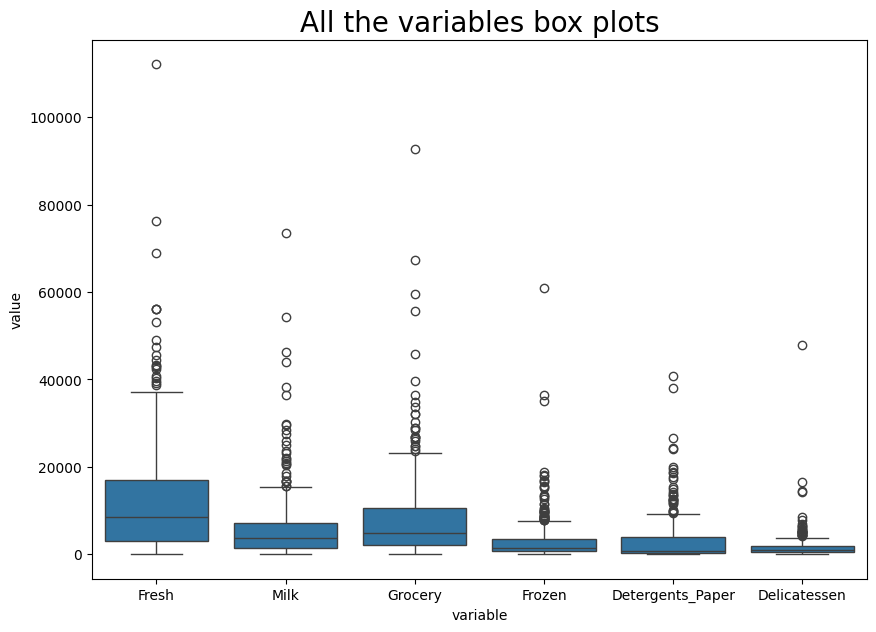

In [13]:
# Box Plots to show distributions of numeric data values,
# especially when you want to compare them between multiple groups.
plt.figure(figsize=(10, 7))
plt.title("All the variables box plots", size=20)
sns.boxplot(x="variable", y="value", data=pd.melt(cust_data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]))
plt.show()

## Distance Measure between Customers

In [16]:
# Sample data for distance calculation
cust_data_sample = cust_data.sample(n=5, random_state=77)
cust_data_sample[['Cust_id', 'Fresh']] #observe with one group first

,Cust_id,Fresh
45,46,5181
223,224,2790
64,65,4760
366,367,9561
288,289,16260


In [18]:
# Sample data for distance calculation
cust_data_sample = cust_data.sample(n=5, random_state=77)
cust_data_sample[['Cust_id', 'Fresh','Grocery']]

,Cust_id,Fresh,Grocery
45,46,5181,21531
223,224,2790,5265
64,65,4760,3250
366,367,9561,1664
288,289,16260,1296


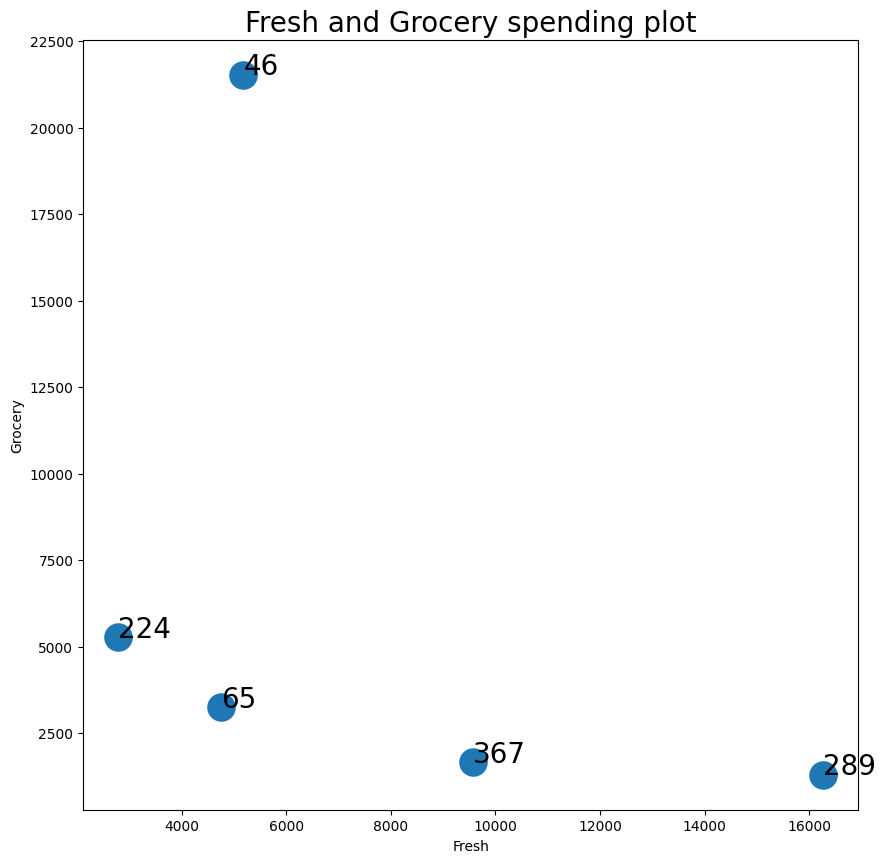

In [19]:
# Scatter plot of customers
plt.figure(figsize=(10, 10))
plt.title("Fresh and Grocery spending plot", size=20)
plot = sns.scatterplot(x="Fresh", y="Grocery", data=cust_data_sample, s=500)
for i in list(cust_data_sample.index):
    plot.text(cust_data_sample.Fresh[i], cust_data_sample.Grocery[i], cust_data_sample.Cust_id[i], size=20)

## Distance Matrix Calculation

In [21]:
def distance_cal(data_frame):
    distance_matrix = np.zeros((data_frame.shape[0], data_frame.shape[0]))
    for i in range(0, data_frame.shape[0]):
        for j in range(0, data_frame.shape[0]):
            distance_matrix[i, j] = round(np.sqrt(sum((data_frame.iloc[i] - data_frame.iloc[j]) ** 2)))
    return(distance_matrix)

distance_matrix = distance_cal(cust_data_sample[['Fresh', 'Grocery']])
print(distance_matrix)
print(distance_matrix[0, 0])
print(distance_matrix[1, 0])
print(distance_matrix[2, 1])

[[    0. 16441. 18286. 20344. 23069.]
 [16441.     0.  2818.  7669. 14043.]
 [18286.  2818.     0.  5056. 11665.]
 [20344.  7669.  5056.     0.  6709.]
 [23069. 14043. 11665.  6709.     0.]]
0.0
16441.0
2818.0


there are Euclidean Euclidean distance is a method for calculating the distance between two points by squaring the differences in each dimension, adding them together, and then taking the square root of the result. The formula for Euclidean distance depends on the number of dimensions being considered

 and manhatton method to find distance.


In [22]:
#manhattan method

def distance_cal_manhattan(data_frame):
    # Initialize a zero matrix with dimensions equal to (n x n)
    distance_matrix = np.zeros((data_frame.shape[0], data_frame.shape[0]))

    # Loop through every pair of rows (i, j)
    for i in range(0, data_frame.shape[0]):
        for j in range(0, data_frame.shape[0]):
            # Calculate Manhattan distance between row i and row j
            distance_matrix[i, j] = round(
                sum(abs(data_frame.iloc[i] - data_frame.iloc[j]))
            )

    # Return the distance matrix
    return distance_matrix

# Usage example
distance_matrix = distance_cal_manhattan(cust_data_sample[['Fresh', 'Grocery']])
print(distance_matrix)
print(distance_matrix[0, 0])
print(distance_matrix[1, 0])
print(distance_matrix[2, 1])

[[    0. 18657. 18702. 24247. 31314.]
 [18657.     0.  3985. 10372. 17439.]
 [18702.  3985.     0.  6387. 13454.]
 [24247. 10372.  6387.     0.  7067.]
 [31314. 17439. 13454.  7067.     0.]]
0.0
18657.0
3985.0


## K-Means Clustering

In [24]:
from sklearn.cluster import KMeans

# Building K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=333) # Mention the Number of clusters
X = cust_data.drop(['Cust_id', 'Channel', 'Region'], axis=1) # Custid is not needed
kmeans = kmeans.fit(X) # Model building

# Getting the cluster labels and attaching them to the original data
cust_data_clusters = cust_data
#define new column to predict cluster
cust_data_clusters['Cluster_id'] = kmeans.predict(X)
cust_data_clusters.head(10)

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_id
0,1,2,3,12669,9656,7561,214,2674,1338,1
1,2,2,3,7057,9810,9568,1762,3293,1776,1
2,3,2,3,6353,8808,7684,2405,3516,7844,1
3,4,1,3,13265,1196,4221,6404,507,1788,4
4,5,2,3,22615,5410,7198,3915,1777,5185,4
5,6,2,3,9413,8259,5126,666,1795,1451,1
6,7,2,3,12126,3199,6975,480,3140,545,1
7,8,2,3,7579,4956,9426,1669,3321,2566,1
8,9,1,3,5963,3648,6192,425,1716,750,1
9,10,2,3,6006,11093,18881,1159,7425,2098,2


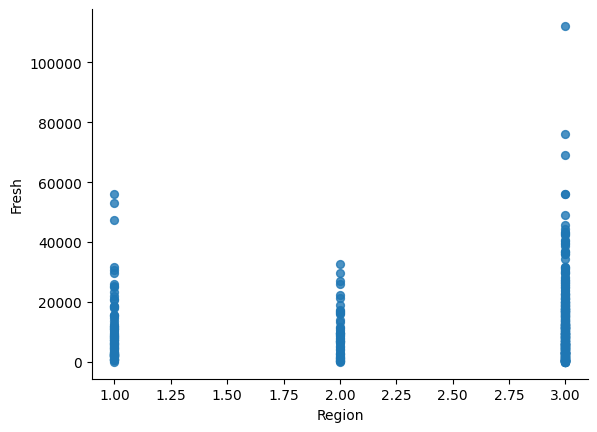

In [27]:
# title Region vs Fresh
#Objective 1: Fresh items are the most sold items in the population.
# Is there a subset in the population where fresh items are sold less than other items such as grocery or milk?
#We want to identify such segments and send them offers on "Fresh items."

from matplotlib import pyplot as plt
cust_data_clusters.plot(kind='scatter', x='Region', y='Fresh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

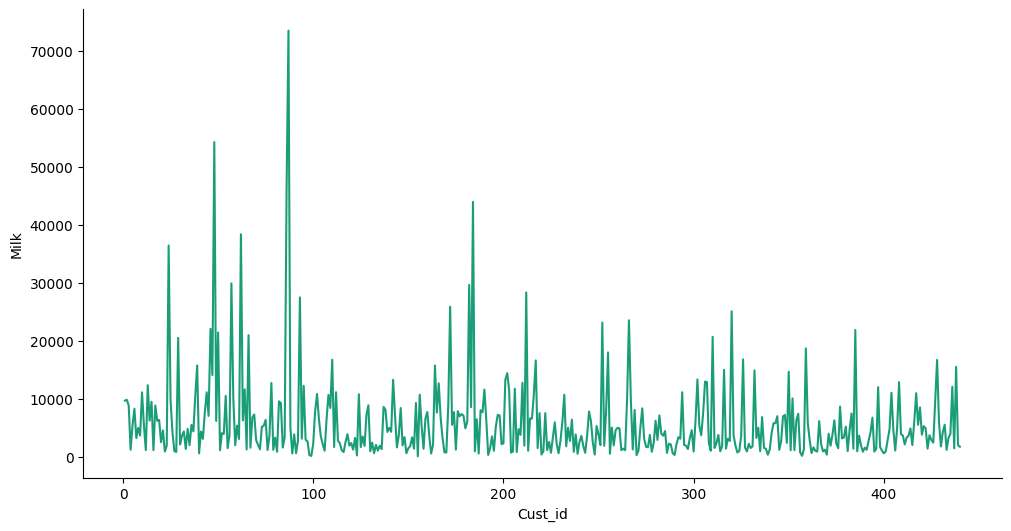

In [26]:
# @title Cust_id vs Milk

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cust_id']
  ys = series['Milk']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cust_data_clusters.sort_values('Cust_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cust_id')
_ = plt.ylabel('Milk')

In [25]:
# Final Results
cluster_counts = cust_data_clusters['Cluster_id'].value_counts(sort=False).sort_index()
cluster_means = cust_data_clusters.groupby(['Cluster_id']).mean()

print(cluster_counts)
print(round(cluster_means, 1))

Cluster_id
0     23
1    235
2     64
3      5
4    113
Name: count, dtype: int64
            Cust_id  Channel  Region    Fresh     Milk  Grocery  Frozen  \
Cluster_id                                                                
0             212.5      1.1     2.7  49296.1   4983.8   5590.3  8285.8   
1             229.2      1.2     2.6   5608.3   3766.5   4765.1  2354.2   
2             209.8      1.9     2.4   5378.7  13536.0  22106.4  1679.5   
3              93.4      1.8     3.0  31259.4  51254.6  52046.6  9916.6   
4             215.8      1.2     2.5  20600.3   3787.8   5089.8  3989.1   

            Detergents_Paper  Delicatessen  
Cluster_id                                  
0                      962.3        2543.7  
1                     1608.8        1009.6  
2                     9811.5        2026.5  
3                    22401.6       12054.4  
4                     1130.1        1639.1  


## Cluster-wise Visualization

Text(0.5, 1.0, 'Cluster wise Spendings')

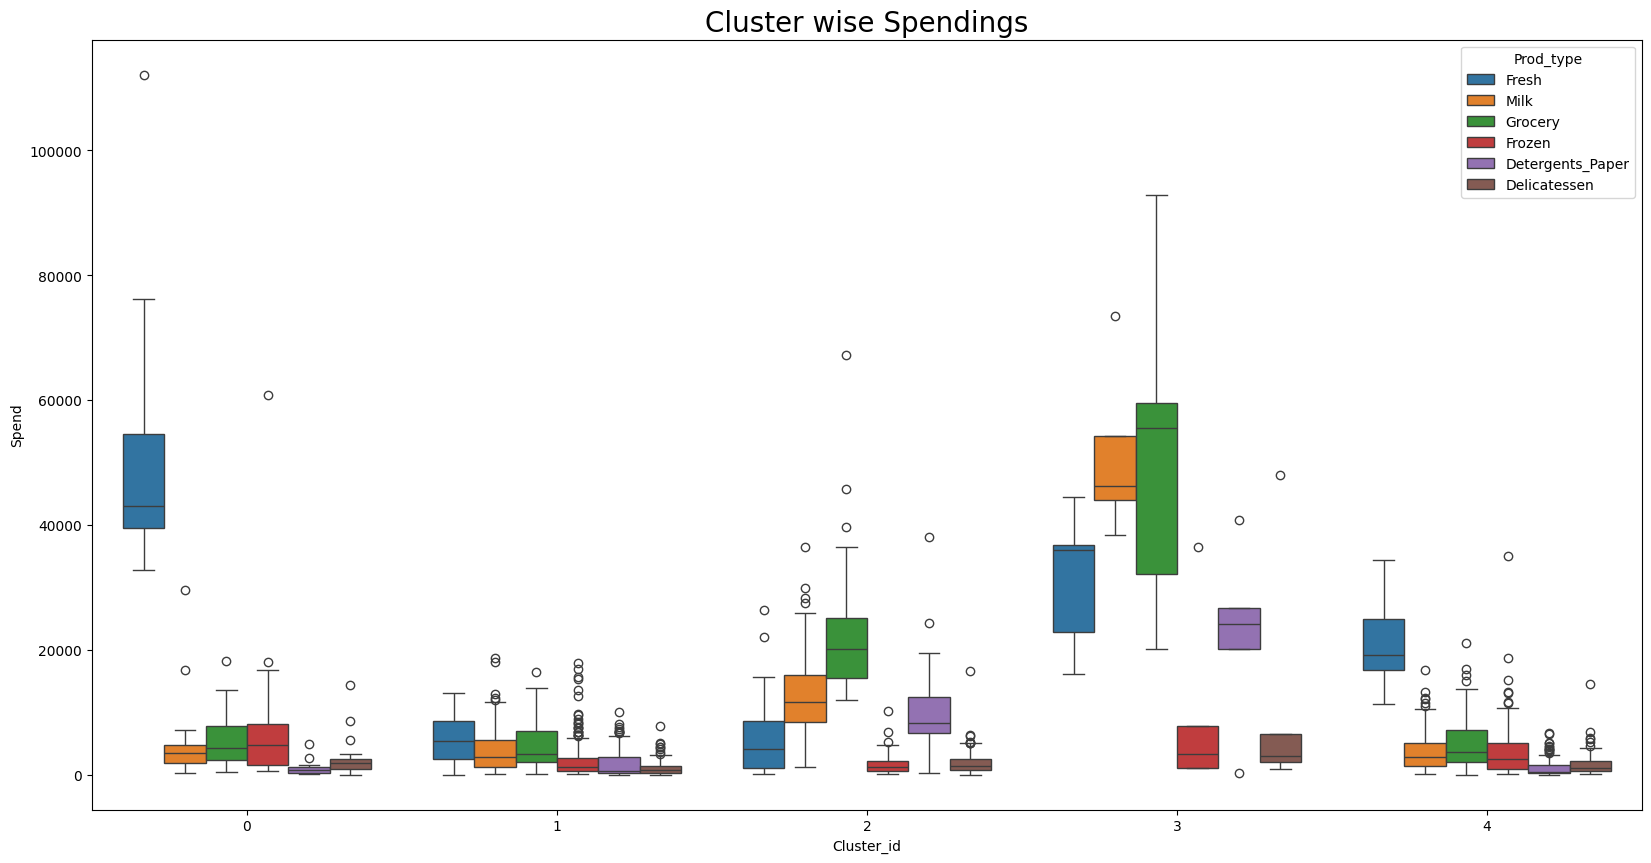

In [29]:
# Cluster-wise Spendings box plot
df_melt = pd.melt(cust_data_clusters.drop(['Cust_id', 'Channel', 'Region'], axis=1), 'Cluster_id', var_name='Prod_type', value_name='Spend')

plt.figure(figsize=(20, 10))
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=df_melt)
plt.title("Cluster wise Spendings", size=20)

 Objective 1: Fresh items are the most sold items in the population. Is there a subset in the population where fresh items are sold less than other items such as grocery or milk? We want to identify such segments and send them offers on "Fresh items."
** there are such as cluster 2,3 can be seen that grocer and milk are alot higher spending that fresh product.**


Objective 2: Find the group of customers with high spending on Fresh and low spending on Frozen, and try cross-selling frozen for that group.
**generally spealing all clusters have high spending on Fresh than Frozen but relatively distintive one are clusters 0,3,4 the can try cross selling frozen to that group.**
or group 1# if you dig deeper



Objective 3: Find a customer segment that spends very less on groceries and send those customers promotional offers on "Grocery."
**cluster 0,1,4 but target 0> 4> ,1 first because 0,4,1 respectively has higher purchase power. **




Text(0.5, 1.0, 'Cluster 0')

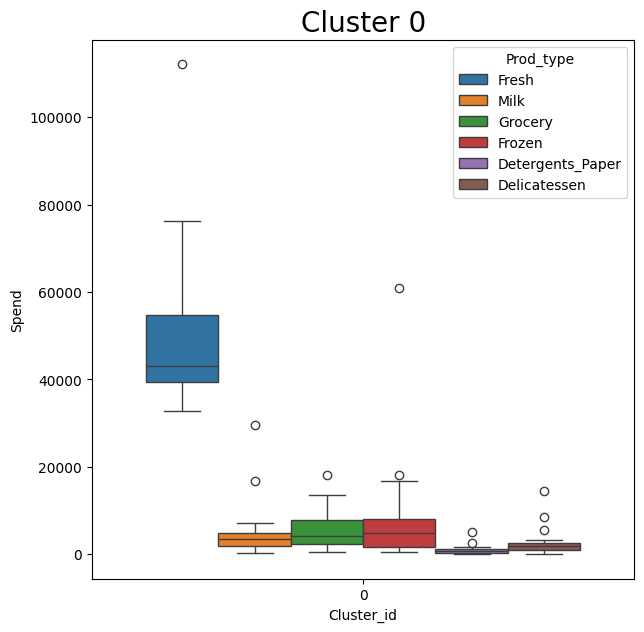

In [30]:
# Cluster 0 to 4
Cluster = df_melt[(df_melt['Cluster_id'] == 0)] # Change this from 0 to 4
plt.figure(figsize=(7, 7))
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=Cluster)
plt.title("Cluster 0", size=20)

## Objectives Analysis

[10, 24, 29, 39, 43, 44, 46, 47, 48, 50, 57, 62, 64, 66, 78, 82, 86, 87, 93, 102, 108, 110, 112, 146, 156, 157, 160, 164, 166, 171, 172, 174, 184, 194, 201, 202, 206, 210, 212, 216, 217, 219, 246, 252, 265, 266, 267, 269, 294, 302, 305, 307, 310, 313, 316, 320, 332, 334, 344, 347, 350, 352, 354, 358, 385, 408, 419, 427, 438]


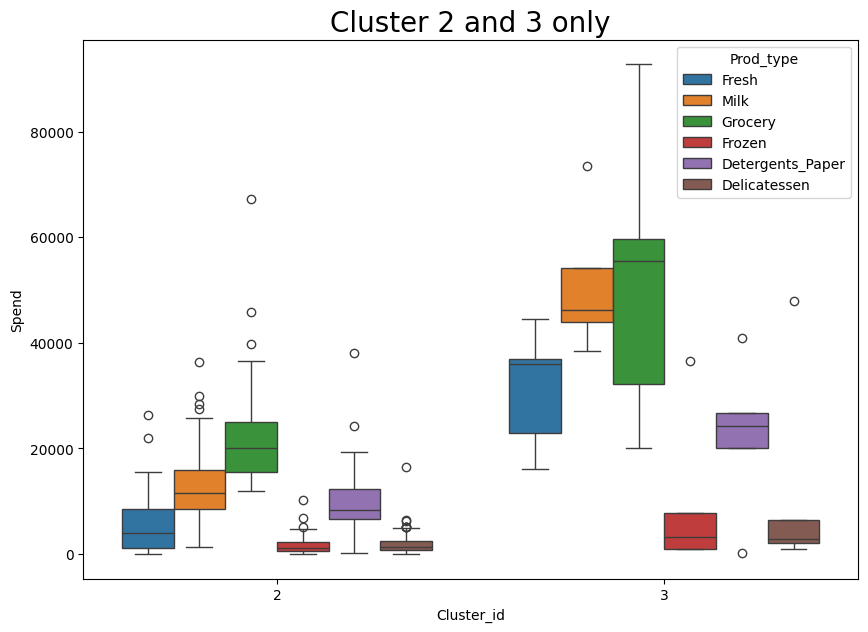

In [32]:
# Objective 1: Customers in Cluster 2 and 3
Cluster_2and3 = df_melt[(df_melt['Cluster_id'] == 2) | (df_melt['Cluster_id'] == 3)]
plt.figure(figsize=(10, 7))
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=Cluster_2and3)
plt.title("Cluster 2 and 3 only", size=20)

obj1_data = cust_data_clusters[(cust_data_clusters['Cluster_id'] == 2) | (cust_data_clusters['Cluster_id'] == 3)]
print(list(obj1_data['Cust_id']))

[4, 5, 13, 14, 15, 19, 21, 23, 25, 26, 28, 31, 33, 34, 37, 38, 41, 42, 55, 59, 68, 71, 72, 74, 76, 84, 90, 92, 94, 105, 106, 113, 114, 115, 119, 121, 127, 128, 133, 139, 141, 142, 145, 150, 151, 153, 158, 163, 191, 192, 196, 197, 203, 211, 218, 221, 227, 233, 235, 238, 241, 242, 243, 248, 249, 254, 256, 263, 268, 270, 277, 280, 284, 288, 289, 295, 297, 301, 308, 312, 323, 324, 325, 329, 333, 335, 336, 337, 348, 355, 357, 361, 369, 372, 374, 381, 382, 383, 388, 394, 402, 403, 404, 405, 407, 422, 423, 424, 425, 428, 433, 435, 436]


Text(0.5, 1.0, 'Cluster 4')

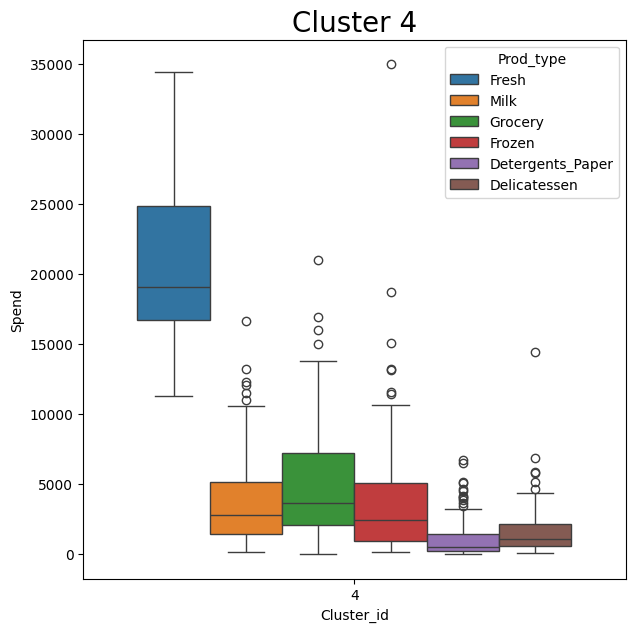

In [33]:
# Objective 2: Customers in Cluster 4 its most distictive answer but I guess in real life we would want to
#try to propose as much leads as we can to maximize the outcome ?
obj2_data = cust_data_clusters[cust_data_clusters['Cluster_id'] == 4]
print(list(obj2_data['Cust_id']))

Cluster = df_melt[(df_melt['Cluster_id'] == 4)]
plt.figure(figsize=(7, 7))
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=Cluster)
plt.title("Cluster 4", size=20)

[1, 2, 3, 6, 7, 8, 9, 11, 12, 16, 17, 18, 20, 22, 27, 32, 35, 36, 45, 49, 51, 52, 54, 56, 58, 60, 61, 63, 65, 67, 69, 70, 73, 75, 77, 79, 80, 81, 83, 85, 89, 91, 95, 96, 97, 98, 99, 100, 101, 103, 107, 109, 111, 116, 117, 118, 120, 122, 123, 124, 129, 131, 132, 134, 135, 136, 137, 138, 140, 144, 147, 148, 149, 152, 154, 155, 159, 161, 162, 165, 167, 168, 169, 170, 173, 175, 176, 178, 179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 193, 195, 198, 199, 200, 204, 205, 207, 208, 209, 213, 214, 215, 220, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 234, 236, 237, 239, 244, 245, 247, 250, 251, 253, 255, 257, 258, 261, 262, 264, 271, 272, 273, 275, 276, 278, 279, 281, 282, 287, 291, 292, 293, 296, 298, 299, 300, 303, 304, 306, 309, 311, 314, 315, 317, 318, 319, 321, 322, 327, 328, 330, 331, 338, 339, 340, 341, 342, 343, 345, 346, 349, 351, 353, 356, 359, 360, 362, 363, 364, 365, 366, 367, 368, 370, 373, 375, 376, 377, 379, 380, 384, 386, 387, 389, 390, 391, 392, 393, 395, 396, 397, 398

Text(0.5, 1.0, 'Cluster 1')

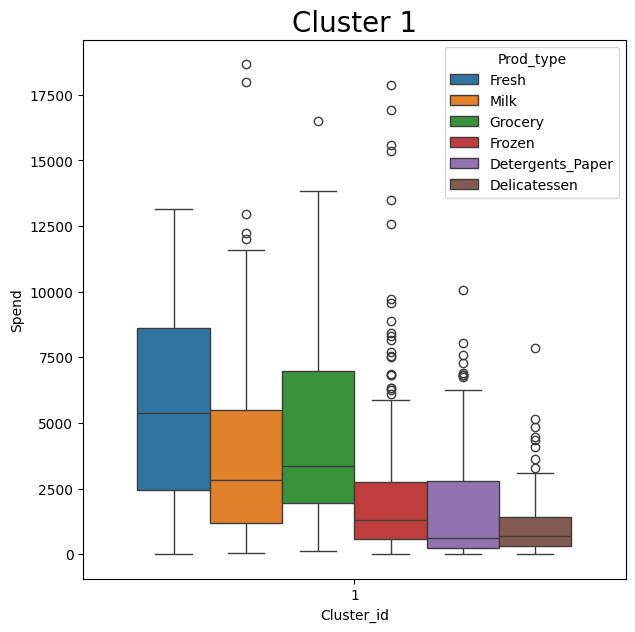

In [34]:
# Objective 3: Customers in Cluster 1
obj3_data = cust_data_clusters[cust_data_clusters['Cluster_id'] == 1]
print(list(obj3_data['Cust_id']))

Cluster = df_melt[(df_melt['Cluster_id'] == 1)]
plt.figure(figsize=(7, 7))
sns.boxplot(x='Cluster_id', hue='Prod_type', y='Spend', data=Cluster)
plt.title("Cluster 1", size=20)

## Model Inertia
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K )

In [36]:
# Model inertia
print(kmeans.inertia_)

53745244528.895546


## Elbow Method

In [37]:
# Elbow method for determining optimal K
elbow_data = pd.DataFrame()
for i in range(1, 16):
    kmeans_m2 = KMeans(n_clusters=i, random_state=333)
    X = cust_data.drop(['Cust_id', 'Channel', 'Region'], axis=1)
    model = kmeans_m2.fit(X)
    elbow_data.at[i, 'K'] = i
    elbow_data.at[i, 'Inertia'] = round(model.inertia_) / 10000000
print(elbow_data)

       K       Inertia
1    1.0  15759.585794
2    2.0  11321.752927
3    3.0   8033.326637
4    4.0   6587.594635
5    5.0   5374.524453
6    6.0   4865.307800
7    7.0   4236.132645
8    8.0   3958.118788
9    9.0   3758.222056
10  10.0   3231.402434
11  11.0   2916.585675
12  12.0   2825.084930
13  13.0   2496.171317
14  14.0   2379.721568
15  15.0   2243.684844


 it’s the point after which adding more clusters doesn’t significantly reduce inertia. In your data, the elbow might appear around
𝐾
=
4
K=4 or
𝐾
=
5
K=5, where the drop in inertia slows down.

Text(0, 0.5, 'Inertia')

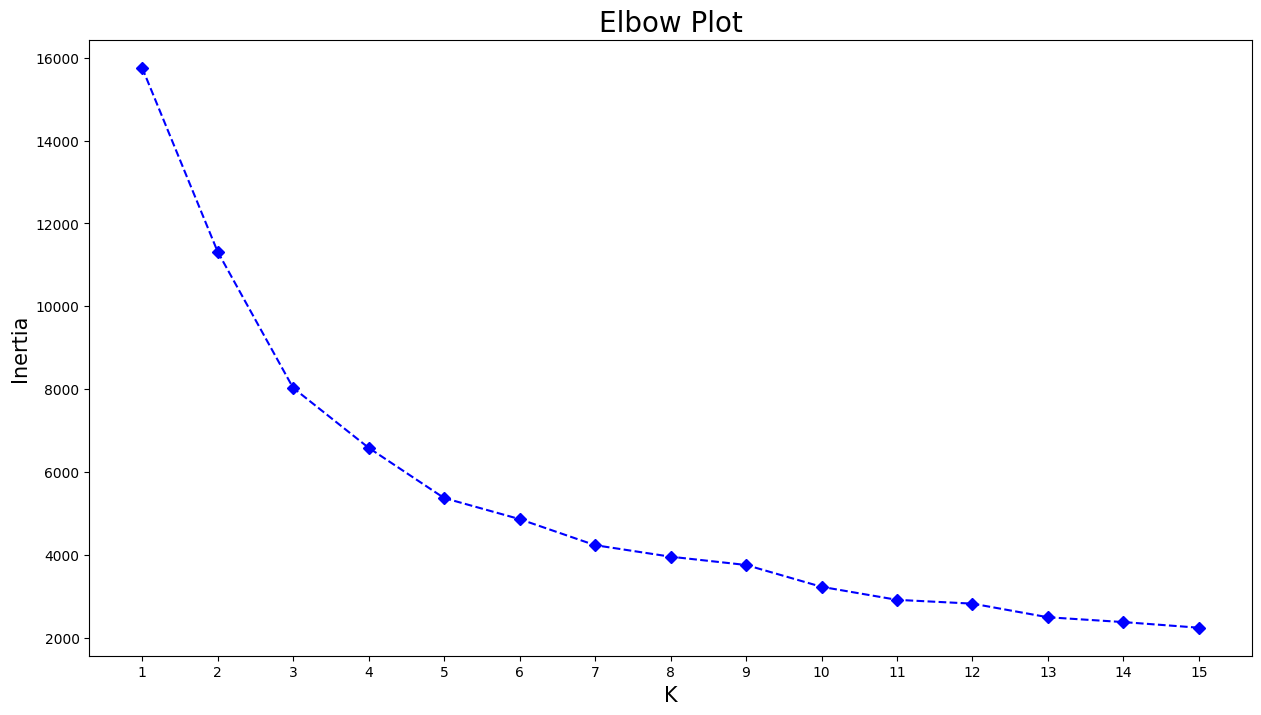

In [38]:
# Elbow Plot
plt.figure(figsize=(15, 8))
plt.title("Elbow Plot", size=20)
plt.plot(elbow_data['K'], elbow_data['Inertia'], '--bD')
plt.xticks(elbow_data['K'])
plt.xlabel("K", size=15)
plt.ylabel("Inertia", size=15)

For n_clusters = 2, the average silhouette score is: 0.511500840762425
For n_clusters = 3, the average silhouette score is: 0.47636651938728114
For n_clusters = 4, the average silhouette score is: 0.38657257139899465
For n_clusters = 5, the average silhouette score is: 0.36629524016422205
For n_clusters = 6, the average silhouette score is: 0.33546362938210567
For n_clusters = 7, the average silhouette score is: 0.32066805567441153
For n_clusters = 8, the average silhouette score is: 0.2787955171755605
For n_clusters = 9, the average silhouette score is: 0.3014547873511874
For n_clusters = 10, the average silhouette score is: 0.25421606356777626
For n_clusters = 11, the average silhouette score is: 0.26231323049116606
For n_clusters = 12, the average silhouette score is: 0.26165030981930754
For n_clusters = 13, the average silhouette score is: 0.26127899021305256
For n_clusters = 14, the average silhouette score is: 0.26489682548104027
For n_clusters = 15, the average silhouette score 

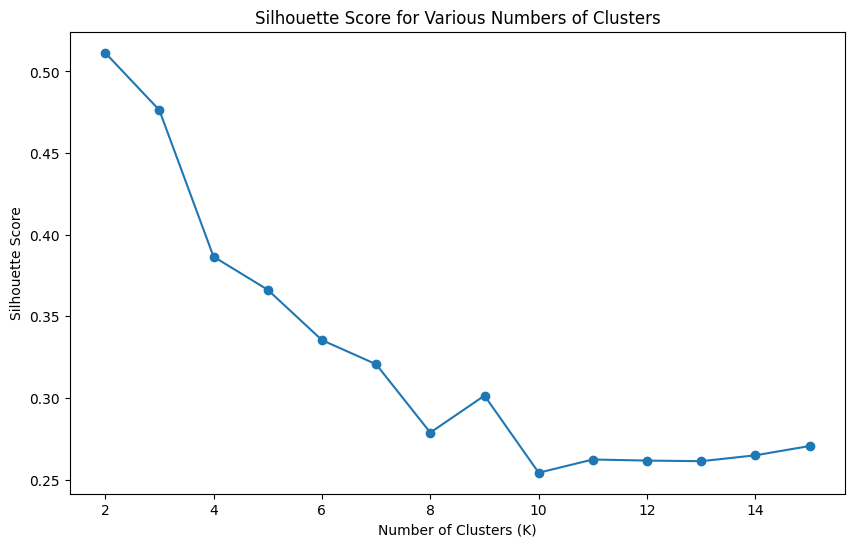

In [39]:
# Silhouette Score (optional)The silhouette score measures how similar each data
# point is to its own cluster compared to other clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range for number of clusters
range_n_clusters = range(2, 16)  # typically, you start from 2 clusters

# Empty lists to hold results
silhouette_avg_scores = []

# Loop over the range of cluster values
for n_clusters in range_n_clusters:
    # Perform clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(cust_data)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(cust_data, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores for different values of K
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title("Silhouette Score for Various Numbers of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()
